In [4]:
from google.colab import files
import pandas as pd

# Carregar arquivo do seu computador para o Colab
uploaded = files.upload()

# Obter o nome do arquivo carregado
file_name = list(uploaded.keys())[0]

# Carregar os dados para um DataFrame
data = pd.read_csv(file_name)

# Visualizar as primeiras linhas do DataFrame
data.head()


Saving jobs_in_data.csv to jobs_in_data.csv


,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [5]:
# Verificar valores nulos
data.isnull().sum()


work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [6]:
# Converter coluna de data para tipo de dados de data
data['work_year'] = pd.to_datetime(data['work_year'])


In [7]:
# Estatísticas descritivas
data.describe()


,salary,salary_in_usd
count,9355.000000,9355.000000
mean,149927.981293,150299.495564
std,63608.835387,63177.372024
min,14000.000000,15000.000000
25%,105200.000000,105700.000000
50%,143860.000000,143000.000000
75%,187000.000000,186723.000000
max,450000.000000,450000.000000


In [8]:
# Verificar e remover duplicatas
data = data.drop_duplicates()


In [10]:
# normalizar colunas de salário
data['salary_normalized'] = data['salary_in_usd'] / data['salary_in_usd'].max()


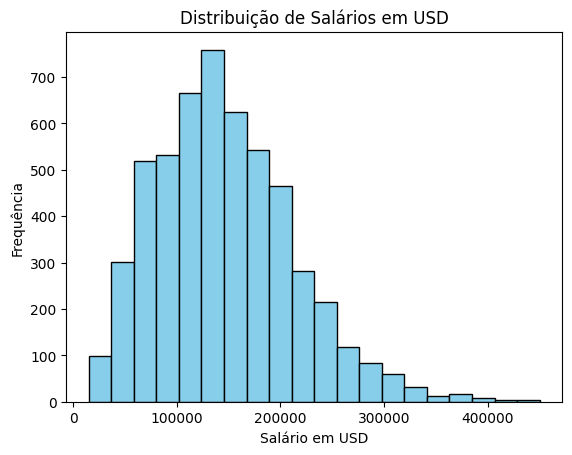

In [11]:
import matplotlib.pyplot as plt

# Histograma da distribuição de salários em USD
plt.hist(data['salary_in_usd'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição de Salários em USD')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()


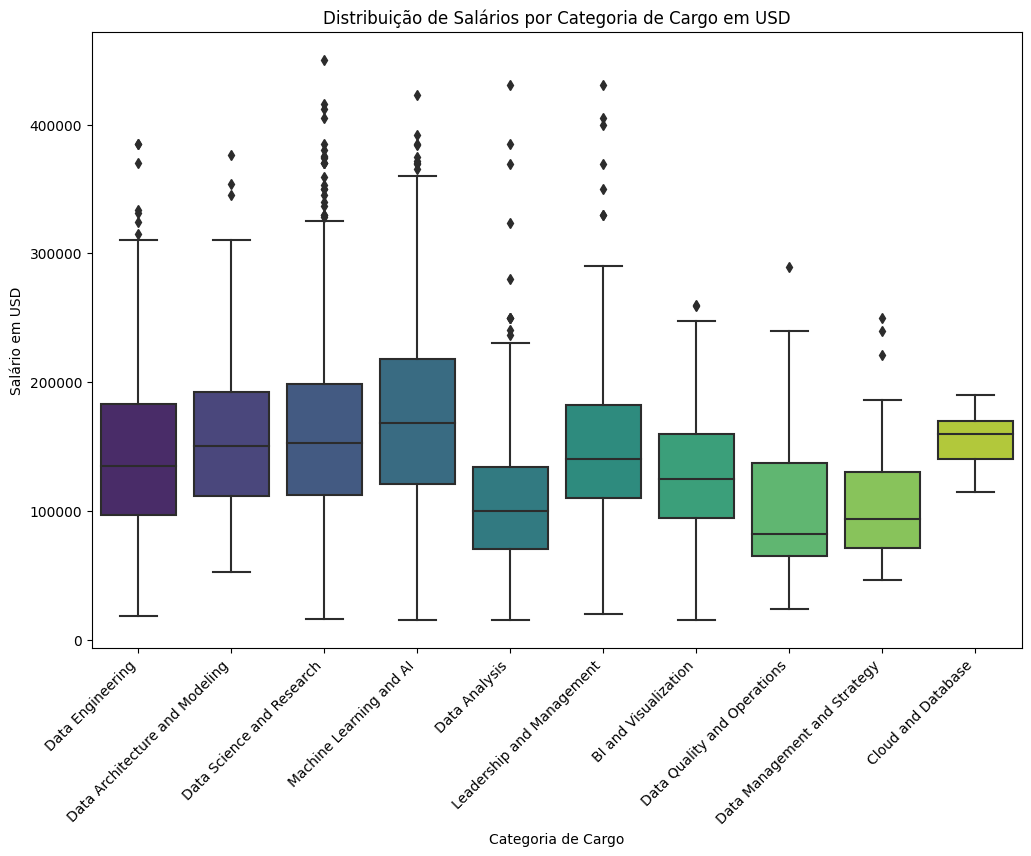

In [12]:
import seaborn as sns

# Boxplot de salários por categoria de cargo
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_category', y='salary_in_usd', data=data, palette='viridis')
plt.title('Distribuição de Salários por Categoria de Cargo em USD')
plt.xlabel('Categoria de Cargo')
plt.ylabel('Salário em USD')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-16-8221517c526a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top_countries['salary_range'] = pd.cut(data_top_countries['salary_in_usd'], bins=bins, labels=labels, right=False)


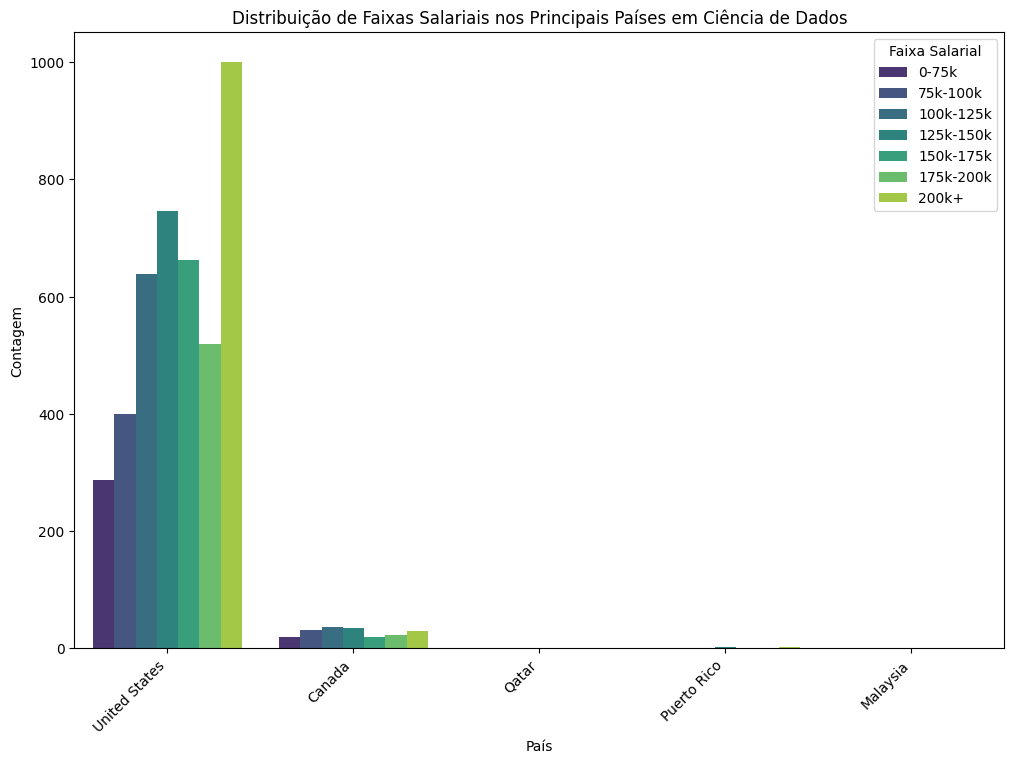

In [16]:
import seaborn as sns

# Selecionar os cinco países com maiores médias salariais
top_countries = data.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(5).index

# Filtrar o DataFrame para incluir apenas os principais países
data_top_countries = data[data['employee_residence'].isin(top_countries)]

# Criar faixas salariais
bins = [0, 75000, 100000, 125000, 150000, 175000, 200000, float('inf')]
labels = ['0-75k', '75k-100k', '100k-125k', '125k-150k', '150k-175k', '175k-200k', '200k+']
data_top_countries['salary_range'] = pd.cut(data_top_countries['salary_in_usd'], bins=bins, labels=labels, right=False)

# Criar um gráfico de barras empilhadas por país e faixa salarial
plt.figure(figsize=(12, 8))
sns.countplot(x='employee_residence', hue='salary_range', data=data_top_countries, palette='viridis')
plt.title('Distribuição de Faixas Salariais nos Principais Países em Ciência de Dados')
plt.xlabel('País')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Faixa Salarial')
plt.show()
